In [15]:
import numpy as np
import matplotlib
import os

In [4]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [5]:
X_test.shape

(10000, 28, 28)

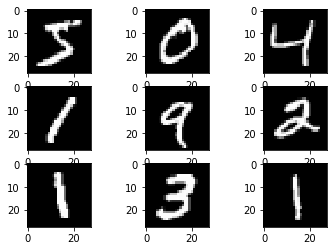

In [6]:
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [7]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [10]:
datagen.fit(X_train)

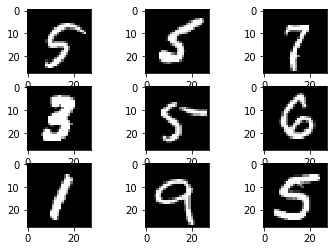

In [11]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [12]:
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)

C:\Users\GallaJ-\AppData\Roaming\Python\Python37\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [13]:
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)

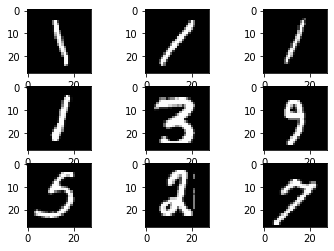

In [16]:
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [18]:
X_train /= 255
X_test /= 255

In [19]:
input_shape = X_train.shape[-3:]

In [20]:
import tensorflow as tf

In [21]:
from keras.models import Sequential
from keras.layers import  Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


In [22]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=X_train,y=y_train, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 26s 435us/step - loss: 0.2058 - accuracy: 0.9378
Epoch 2/15
60000/60000 [==============================] - 26s 434us/step - loss: 0.0855 - accuracy: 0.9733
Epoch 3/15
60000/60000 [==============================] - 24s 401us/step - loss: 0.0588 - accuracy: 0.9816s - loss: 0.0
Epoch 4/15
60000/60000 [==============================] - 25s 412us/step - loss: 0.0454 - accuracy: 0.9852
Epoch 5/15
60000/60000 [==============================] - 25s 414us/step - loss: 0.0379 - accuracy: 0.9874
Epoch 6/15
60000/60000 [==============================] - 28s 466us/step - loss: 0.0292 - accuracy: 0.9901
Epoch 7/15
60000/60000 [==============================] - 26s 430us/step - loss: 0.0242 - accuracy: 0.9920
Epoch 8/15
60000/60000 [==============================] - 25s 409us/step - loss: 0.0219 - accuracy: 0.9924
Epoch 9/15
60000/60000 [==============================] - 25s 410us/step - loss: 0.0205 - accuracy: 0.9926
Epoch 10/15
60000/60000 

In [23]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 84us/step


[0.07799721136026276, 0.9847999811172485]